## 📘 HDB Resale Flat Prices

### 📌 Notebook Description

- **Team:** Team A  
- **Members:** Ben, Shazlin, Alan  
- **Project Name:** HDB Resale Flat Data Engineering Pipeline
- **Description:** Implements automated data ingestion from data.gov.sg and performs dataset merging to produce a unified, analysis-ready dataset.
- **Data Artifacts:**  
    - `/DataLake/<raw files>`  
    - `/Staging/Main.csv`

### 📦 Import Required Libraries

In [1]:
import pandas as pd
from PSQL import PSQL
from sqlalchemy import text
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#---Customized-----------------------------------------
import control_output
pd.set_option("display.float_format", "{:,.2f}".format)
control_output.css

### 🧩 Initialize Class Instance: PSQL

In [2]:
psql = PSQL()

Connected successfully!


### Get Main Table

In [3]:
sql= text("SELECT * FROM main ;")

df = psql.query(sql)
#df["year_month"] = pd.to_datetime(df["year_month"], format="%Y-%m")
df = df.sort_values("year_month", ascending=True)
df = df.set_index("year_month")

Total Rows: 602221


In [4]:
df

town flat_type         flat_model  floor_area_sqm  \
year_month                                                               
2000-01-01     ANG MO KIO       3RM           IMPROVED           69.00   
2000-01-01       TAMPINES        EX  PREMIUM APARTMENT          144.00   
2000-01-01       TAMPINES        EX         Maisonette          146.00   
2000-01-01     ANG MO KIO       3RM     NEW GENERATION           67.00   
2000-01-01       TAMPINES        EX         Maisonette          146.00   
...                   ...       ...                ...             ...   
2023-01-01  BUKIT PANJANG       4RM            MODEL A          103.00   
2023-01-01    BUKIT MERAH       3RM           IMPROVED           59.00   
2023-01-01    BUKIT BATOK       4RM           Model A2           90.00   
2023-01-01    BUKIT MERAH       4RM            MODEL A          100.00   
2023-01-01     ANG MO KIO       3RM     NEW GENERATION           89.00   

                   street_name  resale_price  lease_commence_date  \
year_month                                                          
2000-01-01    ANG MO KIO AVE 4    147,000.00                 1986   
2000-01-01      TAMPINES ST 45    550,000.00                 1996   
2000-01-01      TAMPINES ST 83    482,000.00                 1988   
2000-01-01   ANG MO KIO AVE 10    161,000.00                 1979   
2000-01-01      TAMPINES ST 82    580,000.00                 1995   
...                        ...           ...                  ...   
2023-01-01          PENDING RD    450,000.00                 1988   
2023-01-01  TELOK BLANGAH CRES    346,000.00                 1975   
2023-01-01      BT BATOK ST 25    420,000.00                 1998   
2023-01-01    JLN RUMAH TINGGI    690,000.00                 1997   
2023-01-01   ANG MO KIO AVE 10    425,000.00                 1980   

           storey_range block     remaining_lease  ...    nearest_mrt  \
year_month                                         ...                  
2000-01-01     07 TO 09   170                  85  ...      mayflower   
2000-01-01     10 TO 12  497F                  95  ...  tampines east   
2000-01-01     01 TO 03   857                  87  ...  tampines west   
2000-01-01     10 TO 12   404                  78  ...     ang mo kio   
2000-01-01     07 TO 09  856D                  94  ...       tampines   
...                 ...   ...                 ...  ...            ...   
2023-01-01     01 TO 03   115  64 years 03 months  ...          petir   
2023-01-01     07 TO 09    22  51 years 06 months  ...   harbourfront   
2023-01-01     01 TO 03  288C  74 years 08 months  ...    bukit batok   
2023-01-01     16 TO 18    40  73 years 07 months  ...        redhill   
2023-01-01     07 TO 09   457   56 years 01 month  ...     ang mo kio   

           nearest_distance_to_mrt  remaining_years  price_per_sqm birth  \
year_month                                                                 
2000-01-01                    0.28               85       2,130.43  3585   
2000-01-01                    0.63               95       3,819.44  3585   
2000-01-01                    1.02               87       3,301.37  3585   
2000-01-01                    1.08               78       2,402.99  3585   
2000-01-01                    0.72               94       3,972.60  3585   
...                            ...              ...            ...   ...   
2023-01-01                    0.29               64       4,368.93  2858   
2023-01-01                    1.26               51       5,864.41  2858   
2023-01-01                    1.20               74       4,666.67  2858   
2023-01-01                    0.70               73       6,900.00  2858   
2023-01-01                    1.15               56       4,775.28  2858   

            marriages  divorces  unemployment  inflation                gdp  
year_month                                                                   
2000-01-01       1602       396          3.60       1.34  96,076,

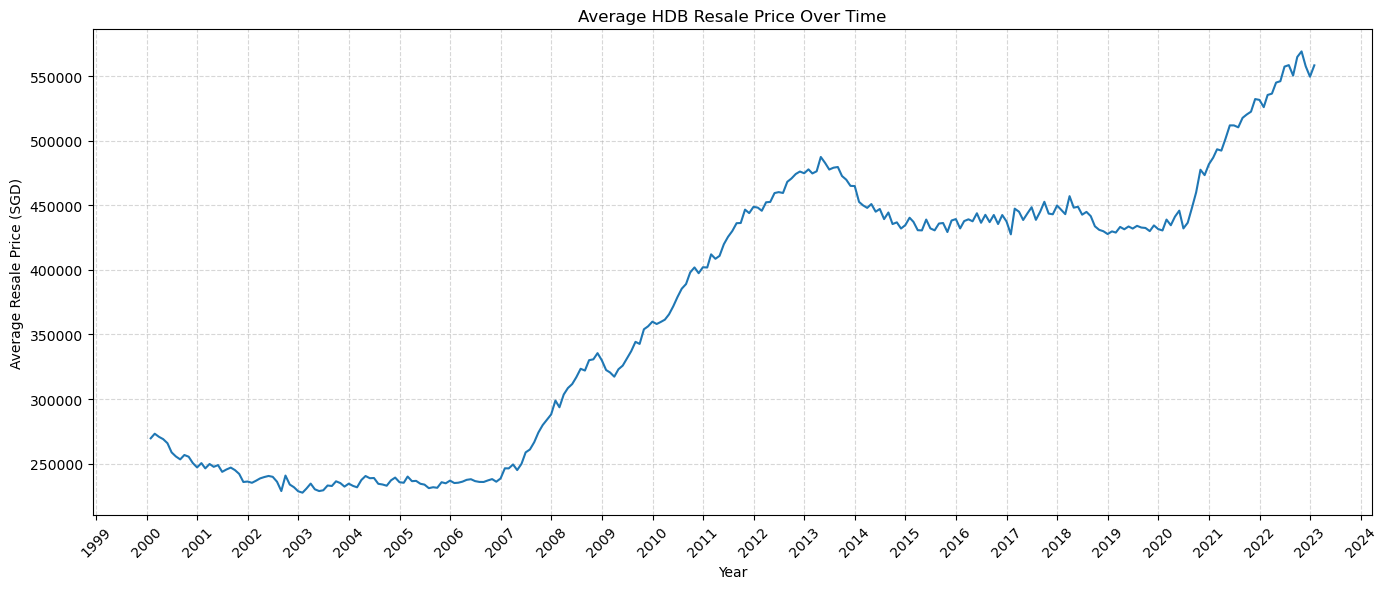

In [5]:
df = df.sort_index()
s = df["resale_price"].resample("M").mean()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(s.index, s.values)

ax.set_title("Average HDB Resale Price Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Average Resale Price (SGD)")

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))        # 1 = every year, 2 = every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Optional: rotate labels and add grid
plt.xticks(rotation=45)
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [6]:
num_cols = [
    "resale_price",
    "floor_area_sqm",
    "lease_commence_date",
    "nearest_distance_to_mrt",
    "birth",
    "marriages",
    "divorces",
    "unemployment",
    "inflation",
    "gdp"
]

df_num = df[num_cols]

df_num = df_num.dropna()

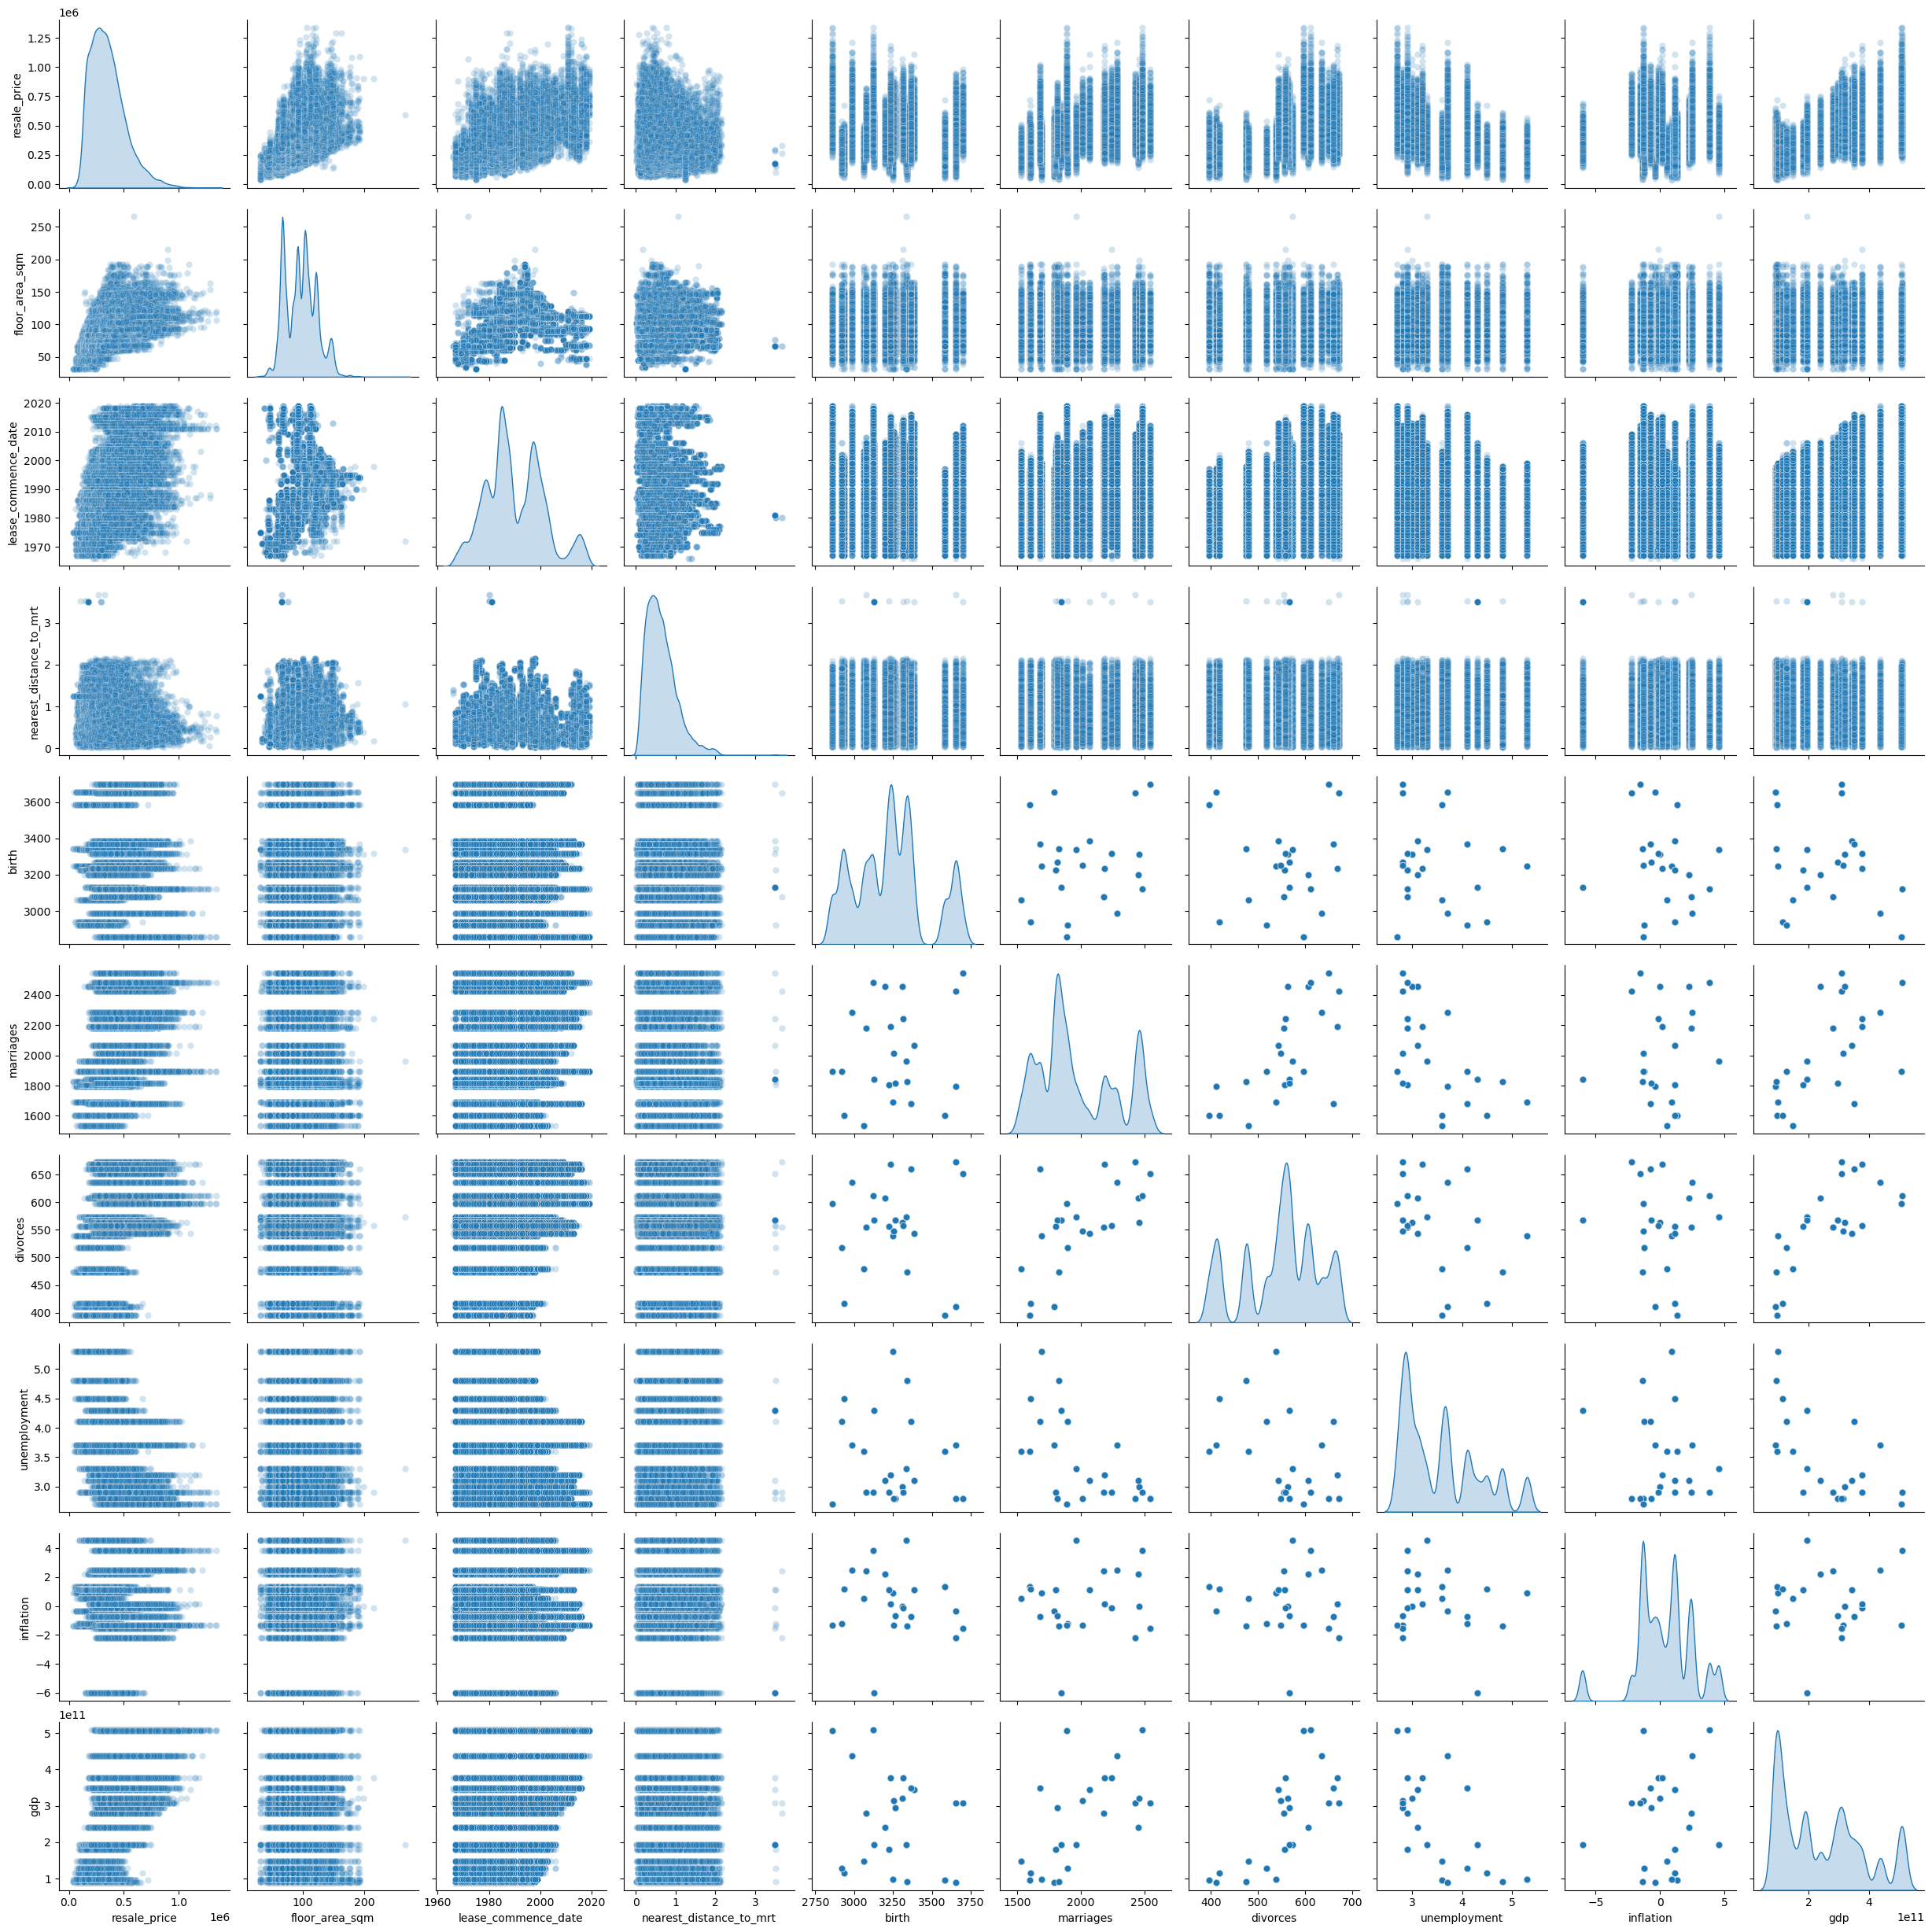

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_num, 
             diag_kind="kde",     # nicer diagonal plots
             plot_kws={'alpha': 0.2})  # transparent points
plt.show()

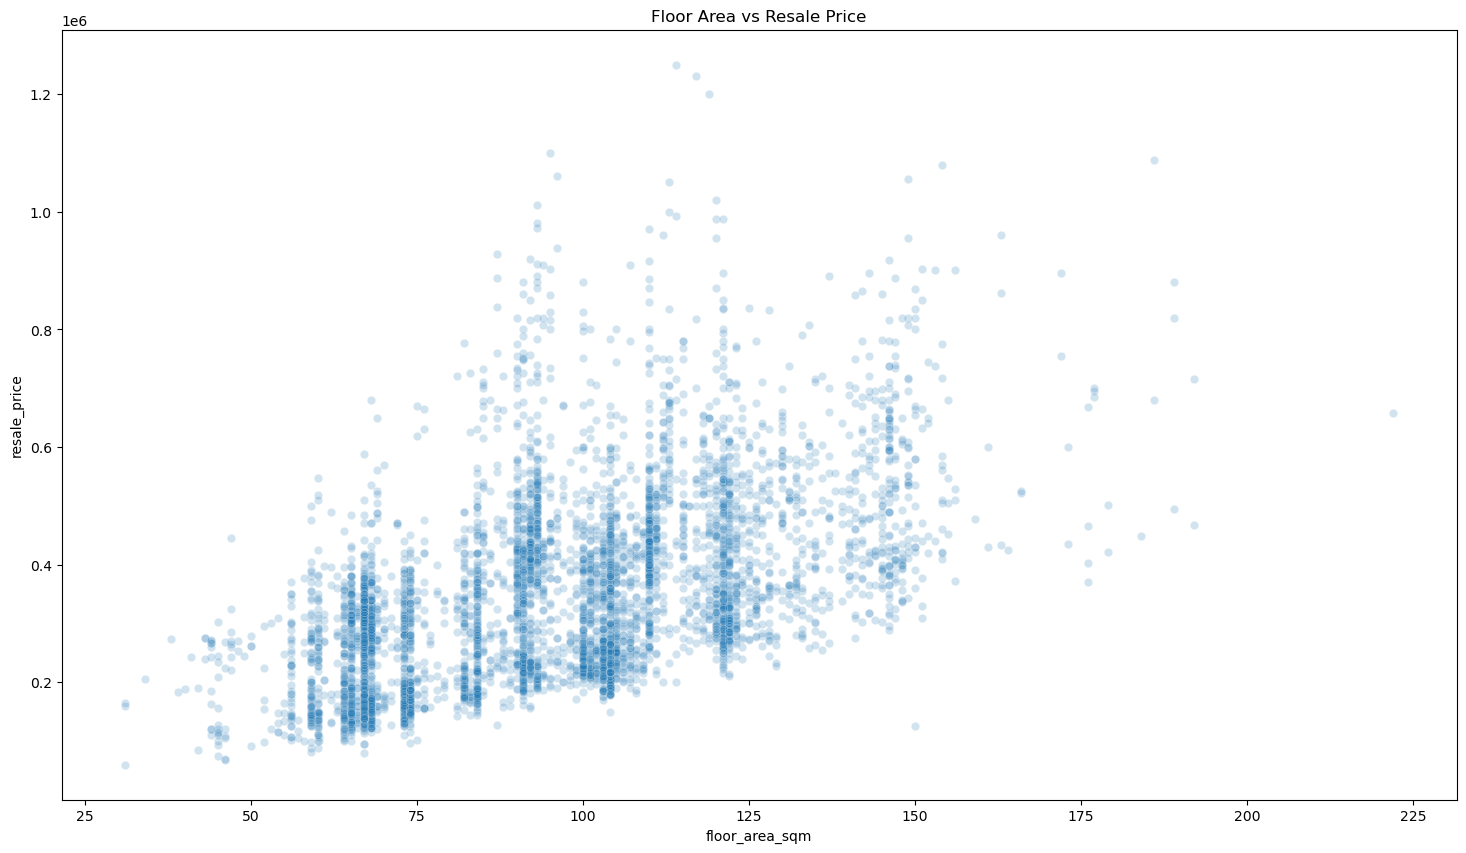

In [8]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df.sample(5000), x="floor_area_sqm", y="resale_price", alpha=0.2)
plt.title("Floor Area vs Resale Price")
plt.show()

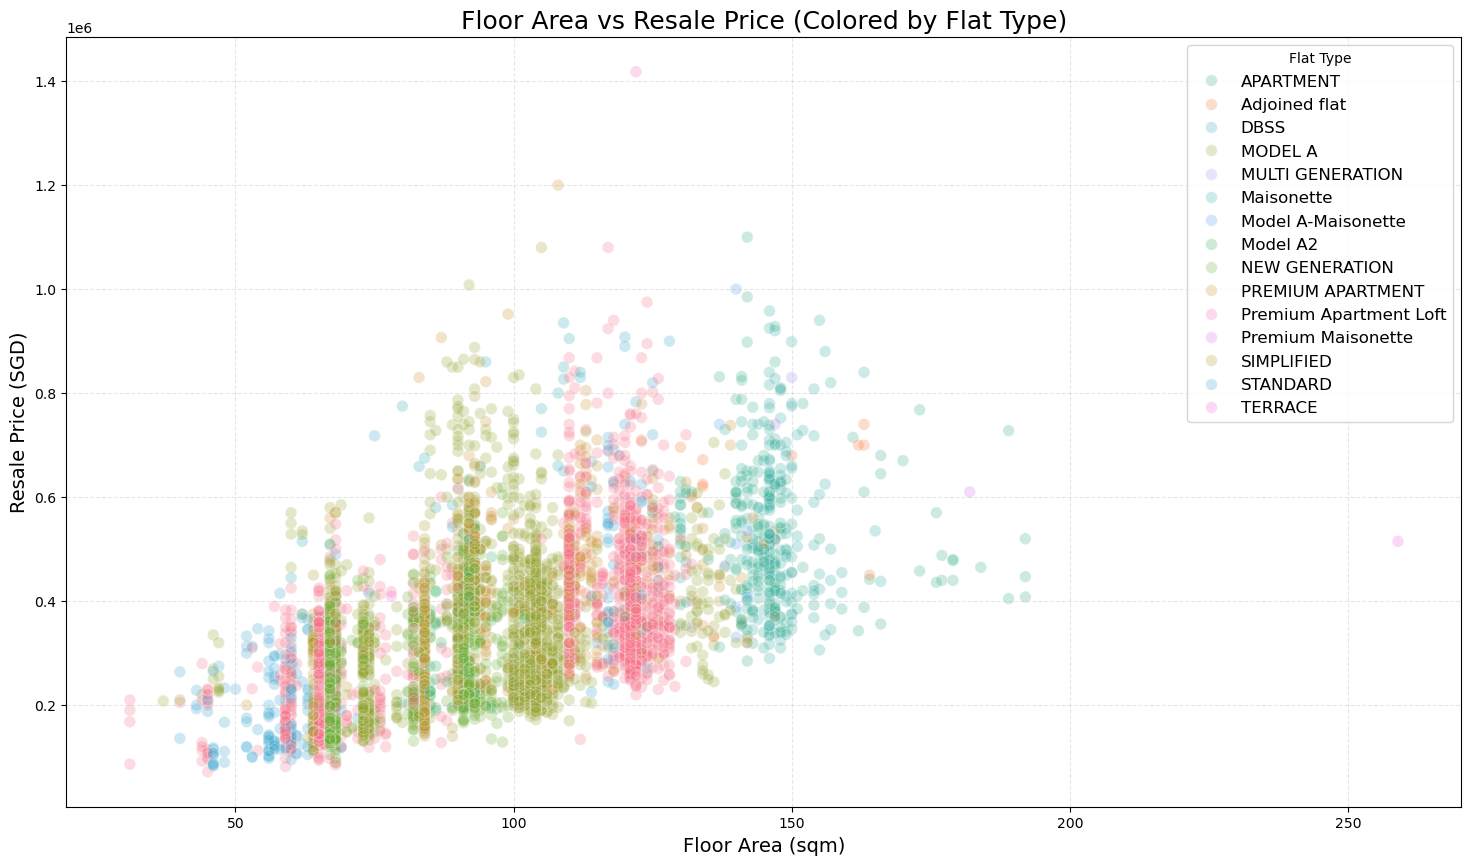

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# sample for readability
df_sample = df.sample(5000, random_state=42)

plt.figure(figsize=(18, 10))

ax = sns.scatterplot(
    data=df_sample,
    x="floor_area_sqm",
    y="resale_price",
    hue="flat_model",
    alpha=0.25,
    s=70
)

# --- SORT THE LEGEND ---
# Get current legend handles + labels
handles, labels = ax.get_legend_handles_labels()

# Sort by label name
sorted_pairs = sorted(zip(labels[1:], handles[1:]))  # skip "hue" title
sorted_labels, sorted_handles = zip(*sorted_pairs)

# Create new sorted legend
ax.legend(sorted_handles, sorted_labels, title="Flat Type", fontsize=12)

# Titles and labels
plt.title("Floor Area vs Resale Price (Colored by Flat Type)", fontsize=18)
plt.xlabel("Floor Area (sqm)", fontsize=14)
plt.ylabel("Resale Price (SGD)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(
    df,
    x_col="floor_area_sqm",
    y_col="resale_price",
    hue_col="flat_type",
    sample_n=5000,
    legend_sort=True,
    figsize=(18, 10),
    alpha=0.25,
    point_size=70,
):
    # Sample for readability
    df_plot = df
    if sample_n is not None and sample_n < len(df):
        df_plot = df.sample(sample_n, random_state=42)

    plt.figure(figsize=figsize)

    ax = sns.scatterplot(
        data=df_plot,
        x=x_col,
        y=y_col,
        hue=hue_col,
        alpha=alpha,
        s=point_size,
    )

    # Legend handling
    if legend_sort:
        handles, labels = ax.get_legend_handles_labels()
        # Skip first label if it's the hue title
        if labels and labels[0] == hue_col:
            base_label = labels[0]
            pairs = sorted(zip(labels[1:], handles[1:]))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title=hue_col)
        else:
            pairs = sorted(zip(labels, handles))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title=hue_col)

    plt.title(f"{x_col} vs {y_col} (colored by {hue_col})", fontsize=18)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()


In [11]:
from ipywidgets import interact, IntSlider, Dropdown, Checkbox

numeric_cols = [
    "resale_price",
    "floor_area_sqm",
    "nearest_distance_to_mrt",
    "lease_commence_date",
    "birth",
    "marriages",
    "divorces",
    "unemployment",
    "inflation",
    "gdp",
]

categorical_cols = ["flat_type", "town", "flat_model"]

@interact(
    x_col=Dropdown(options=numeric_cols, value="floor_area_sqm", description="X:"),
    y_col=Dropdown(options=numeric_cols, value="resale_price", description="Y:"),
    hue_col=Dropdown(options=categorical_cols, value="flat_type", description="Color by:"),
    sample_n=IntSlider(value=5000, min=1000, max=20000, step=1000, description="Sample n:"),
    legend_sort=Checkbox(value=True, description="Sort legend"),
)
def interactive_scatter(x_col, y_col, hue_col, sample_n, legend_sort):
    plot_scatter(
        df,
        x_col=x_col,
        y_col=y_col,
        hue_col=hue_col,
        sample_n=sample_n,
        legend_sort=legend_sort,
    )

interactive(children=(Dropdown(description='X:', index=1, options=('resale_price', 'floor_area_sqm', 'nearest_…

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(
    df,
    x_col="floor_area_sqm",
    y_col="resale_price",
    hue_col="flat_type",
    sample_n=5000,
    legend_sort=True,
    flat_types=None,          # ← NEW: list of flat types to keep
    figsize=(18, 10),
    alpha=0.25,
    point_size=70,
):
    df_plot = df

    # --- filter by selected flat types (if provided) ---
    if flat_types:
        df_plot = df_plot[df_plot[hue_col].isin(flat_types)]

    # sample for readability
    if sample_n is not None and sample_n < len(df_plot):
        df_plot = df_plot.sample(sample_n, random_state=42)

    plt.figure(figsize=figsize)

    ax = sns.scatterplot(
        data=df_plot,
        x=x_col,
        y=y_col,
        hue=hue_col,
        alpha=alpha,
        s=point_size,
    )

    # --- sort legend if requested ---
    if legend_sort:
        handles, labels = ax.get_legend_handles_labels()
        if labels and labels[0] == hue_col:
            base_label = labels[0]
            pairs = sorted(zip(labels[1:], handles[1:]))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title=hue_col)
        else:
            pairs = sorted(zip(labels, handles))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title=hue_col)

    plt.title(f"{x_col} vs {y_col} (colored by {hue_col})", fontsize=18)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()


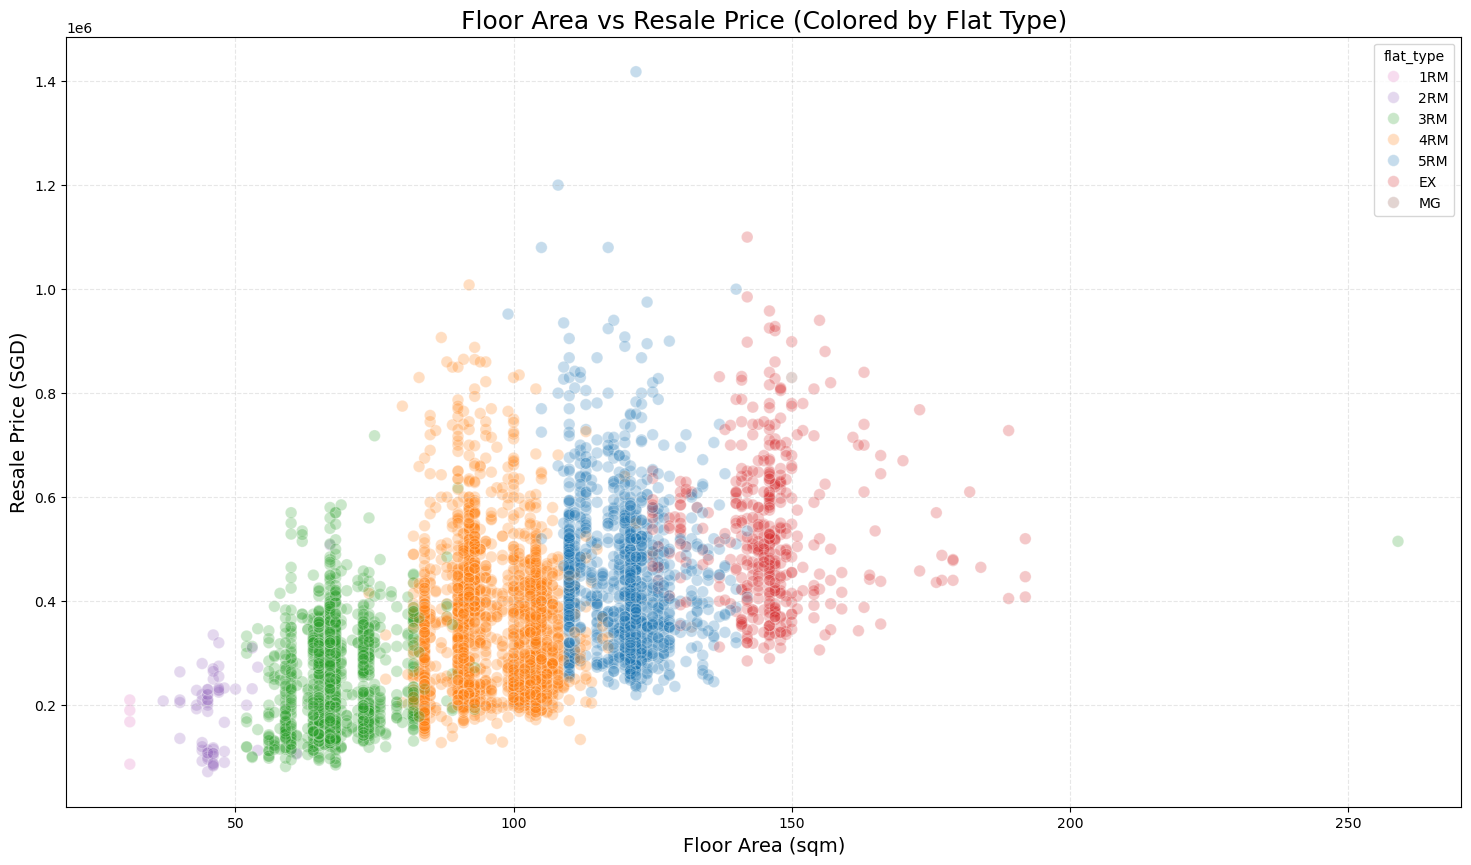

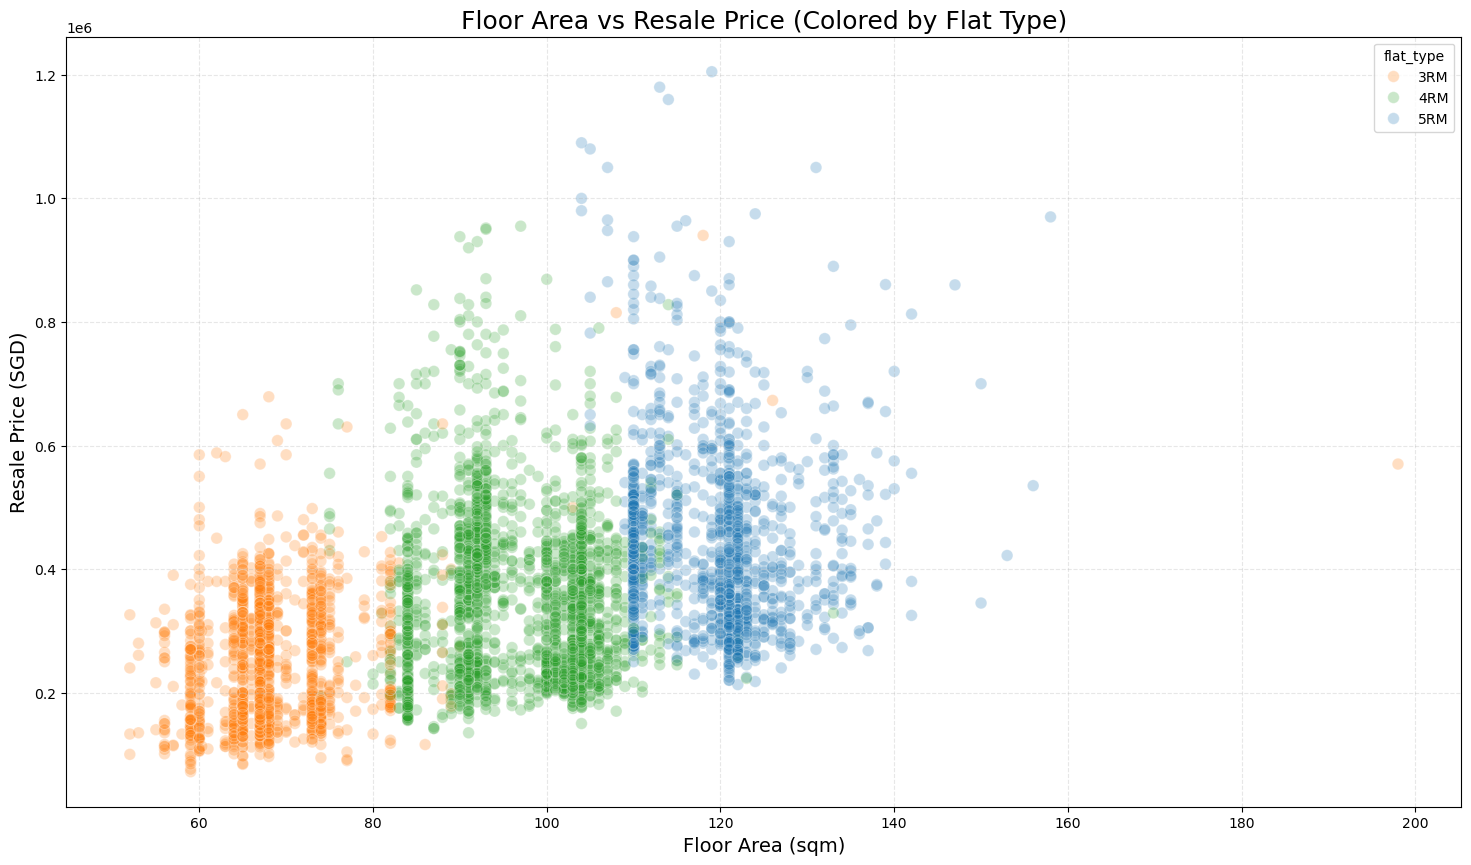

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------- Function definition ---------
def plot_floor_vs_price(
    df,
    flat_types=None,        # list like ["3 ROOM", "4 ROOM"], or None for all
    sample_n=5000,          # number of points to sample for readability
    figsize=(18, 10),
    alpha=0.25,
    point_size=70,
    legend_sort=True,
):
    """
    Scatter plot: floor_area_sqm vs resale_price, colored by flat_type.
    Optionally filter to only certain flat_types.
    """

    df_plot = df

    # 1) Filter by flat_types if provided
    if flat_types is not None and len(flat_types) > 0:
        df_plot = df_plot[df_plot["flat_type"].isin(flat_types)]

    # 2) Sample to keep plot readable
    if sample_n is not None and sample_n < len(df_plot):
        df_plot = df_plot.sample(sample_n, random_state=42)

    # 3) Create the figure
    plt.figure(figsize=figsize)

    ax = sns.scatterplot(
        data=df_plot,
        x="floor_area_sqm",
        y="resale_price",
        hue="flat_type",
        alpha=alpha,
        s=point_size,
    )

    # 4) Optional: sort legend labels
    if legend_sort:
        handles, labels = ax.get_legend_handles_labels()
        # seaborn legend usually has first label as title like "flat_type"
        if labels and labels[0].lower() == "flat_type":
            base_label = labels[0]
            pairs = sorted(zip(labels[1:], handles[1:]))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title="flat_type")
        else:
            pairs = sorted(zip(labels, handles))
            sorted_labels, sorted_handles = zip(*pairs)
            ax.legend(sorted_handles, sorted_labels, title="flat_type")

    # 5) Labels, title, grid
    plt.title("Floor Area vs Resale Price (Colored by Flat Type)", fontsize=18)
    plt.xlabel("Floor Area (sqm)", fontsize=14)
    plt.ylabel("Resale Price (SGD)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.3)

    plt.show()


# --------- How to use it ---------

# 1) All flat types
plot_floor_vs_price(df)

# 2) Only selected flat types (example)
#    Change this list to whatever flat types you want
selected_flats = ["3RM", "4RM", "5RM"]
plot_floor_vs_price(df, flat_types=selected_flats)
